# Семинар 4 – Линейные модели

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(palette='deep', style='darkgrid', rc={"figure.figsize": (15, 4)})
import scipy.stats as st

import warnings
warnings.simplefilter('ignore')

Сгенерируем исскуственные данные

In [3]:
def lin_function(x):
    return 4*x+5

x_true = np.array([-2,2])
y_true = lin_function(x_true)


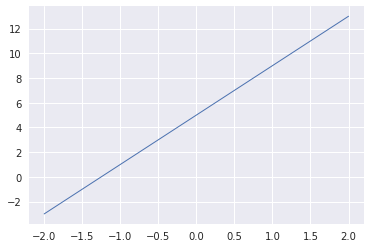

In [4]:
plt.plot(x_true, y_true, linewidth=1)
plt.show()

In [5]:
n = 100
x = np.random.rand(n,1)*4-2
e = np.random.rand(n,1)*4-2
y = lin_function(x) + e


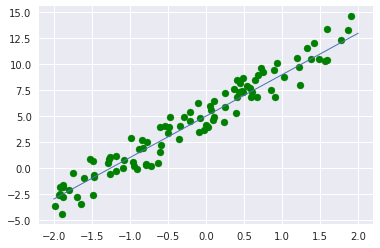

In [6]:
plt.scatter(x, y, color='g')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

# Аналитический метод
$$\hat \theta = \bigl(X^T \cdot X  \bigr)^{-1} \cdot X^T \cdot y $$

In [7]:
x_matrix = np.c_[np.ones((n,1)),x]

In [8]:
%%time
thetha_matrix = np.linalg.inv(x_matrix.T.dot(x_matrix)).dot(x_matrix.T).dot(y)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 369 µs


In [9]:
thetha_matrix.T[0].tolist()

[5.191191438103591, 4.124388005668198]

In [10]:
print("Свободный член: {[0][0]:.7}".format(thetha_matrix.T))
print("Коэфициент: {[0][1]:.7}".format(thetha_matrix.T))

Свободный член: 5.191191
Коэфициент: 4.124388


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [12]:
%%time
lr = LinearRegression()
lr.fit(x,y)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.67 ms


In [13]:
print("Свободный член: {:.7}".format(lr.intercept_[0]))
print("Коэфициент: {:.7}".format(lr.coef_[0][0]))

Свободный член: 5.191191
Коэфициент: 4.124388


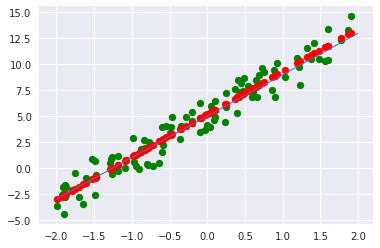

In [14]:
plt.scatter(x, y, color='g')
plt.scatter(x, lr.predict(x), color='r')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

# Пакетный градиентный спуск

$$\nabla MSE(\theta)= \frac{2}{l} X^T \cdot \bigl(X \cdot \theta - y \bigr) $$

### Реализация в numpy

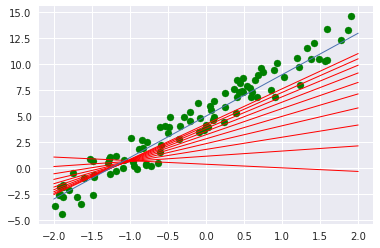

[[5.1911914 ]
 [4.12438798]]
CPU times: user 290 ms, sys: 320 ms, total: 610 ms
Wall time: 226 ms


In [20]:
%%time
eta = 0.1  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta = theta - eta * gradients

plt.plot(x_true, y_true, linewidth=1)
plt.show()

print(theta)

### Слишком маленький шаг обучения (learning rate)

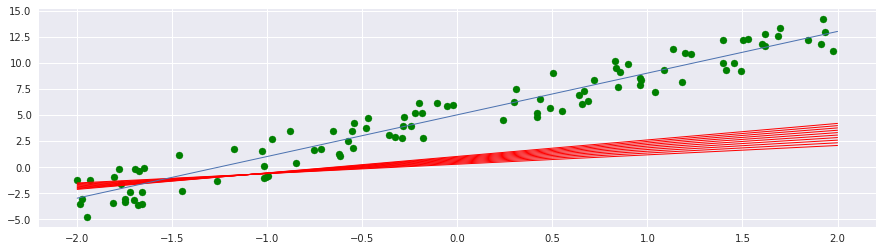

In [21]:
eta = 0.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta = theta - eta * gradients

plt.plot(x_true, y_true, linewidth=1)
plt.show()

### Слишком большой шаг обучения (learning rate)

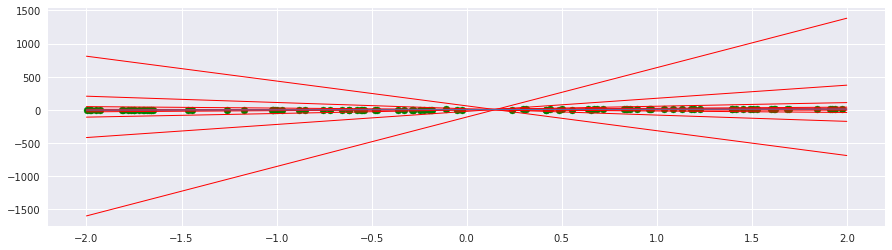

In [22]:
eta = 1.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta = theta - eta * gradients

plt.plot(x_true, y_true, linewidth=1)
plt.show()

# Уменьшение шага на каждой итерации

In [23]:
eta = 1  # learning rate
n_iterations = 1000

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta = theta - (eta/(iteration+1)) * gradients


print(theta)

[[4.97003264]
 [4.04990718]]


Learning rate - гипперпараметр, и можно воспользоваться GridSearchCV, однако чтобы не учить каждый раз такое кол-во итераций, мы можем измерять норму градиента, и прекращать спуск, когда он "затух"

In [25]:
eta = 0.1  # learning rate
n_iterations = 1000
tol = 0.00001

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    if np.linalg.norm(gradients) < tol:
        break
    theta = theta - eta * gradients

print('Градиент затух на {} итерации '.format(iteration))
print(theta)

Градиент затух на 64 итерации 
[[4.97002797]
 [4.04990645]]


__Реализация в Scikit-Learn отсутствует__
  
  
# Cтохастический градиентный спуск  

In [28]:
n_epochs = 50

def learning_schedule(t):
    return t0 / (t + t1)

t0, t1 = 5, 100  # learning schedule hyperparameters


theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(n):
        random_index = np.random.randint(n)
        xi = x_matrix[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * n + i)
        theta = theta - eta * gradients
print(theta)

[[4.99282744]
 [4.02118158]]


In [29]:
from sklearn.linear_model import SGDRegressor

In [30]:
sgd = SGDRegressor(tol=0.0001)
#The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).
sgd.fit(x,y)
sgd.intercept_, sgd.coef_

(array([4.94466428]), array([4.04716787]))

# Полиномиальные модели

$y = \cos(x)$, $x \in [-5,5]  $
   
  
$y = \cos(x) + \varepsilon$, где  $\varepsilon = \mathscr{N} \bigl(0,\frac{1}{2} \bigr)$, $x \in [-5,5]$


In [31]:
n = 100
n2 = 20
x = np.linspace(-5,5,num=n)
x_dt = np.linspace(-5,5,num=n2)
y_true = np.cos(x)
noise = np.random.sample(n2)/2-0.25
y_noised = np.cos(x_dt) + noise

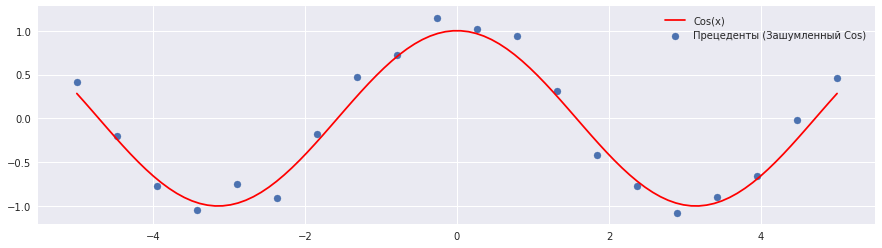

In [32]:
plt.scatter(x_dt,y_noised,  label="Прецеденты (Зашумленный Cos)")
plt.plot(x,y_true, color='red', label="Cos(x)")
plt.legend()
plt.show()

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
LR = LinearRegression()

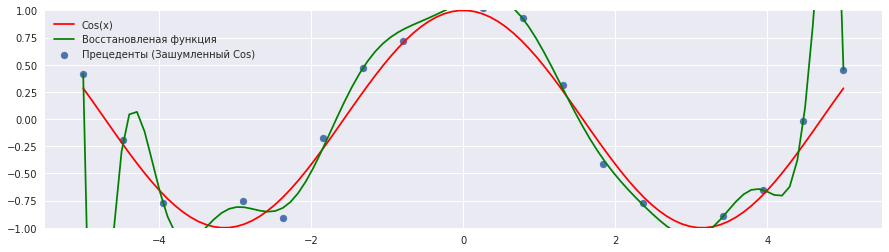

In [48]:
poly = PolynomialFeatures(15)
x_poly2 = poly.fit_transform(x_dt.reshape(-1, 1))
LR.fit(x_poly2, y_noised)
pred = LR.predict(poly.transform(np.linspace(-5,5,num=n).reshape(-1, 1)))
pred_poly_11 = LR.predict(x_poly2)
plt.scatter(x_dt,y_noised,  label="Прецеденты (Зашумленный Cos)")
plt.plot(x,y_true, color='red', label="Cos(x)")
plt.plot(np.linspace(-5,5,num=n),pred, color='green', label="Восстановленая функция")
plt.ylim([-1,1])
plt.legend()
plt.show()

# Регуляризация моделей

In [42]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [49]:
LR = Lasso()

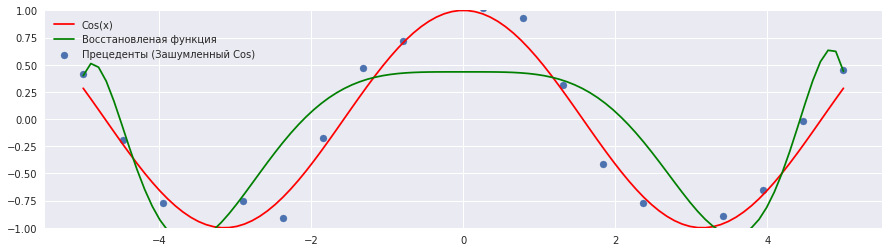

In [50]:
poly = PolynomialFeatures(15)
x_poly2 = poly.fit_transform(x_dt.reshape(-1, 1))
LR.fit(x_poly2, y_noised)
pred = LR.predict(poly.transform(np.linspace(-5,5,num=n).reshape(-1, 1)))
pred_poly_11 = LR.predict(x_poly2)
plt.scatter(x_dt,y_noised,  label="Прецеденты (Зашумленный Cos)")
plt.plot(x,y_true, color='red', label="Cos(x)")
plt.plot(np.linspace(-5,5,num=n),pred, color='green', label="Восстановленая функция")
plt.ylim([-1,1])
plt.legend()
plt.show()

In [45]:
pd.DataFrame(np.round(LR.coef_, decimals=2), columns=['Feature Coef']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Feature Coef,0.0,-0.0,-0.0,-0.0,-0.03,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
